In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pseudorandom number generation

## Middle-square method

Initially scientists relied on drawing balls from pots, rolling dice, or drawing cards, and later used mechanical devices for random number generation. However, these methods proved inadequate for their purposes. This led to the interest in using computer programs to generate random numbers. In 1946, John von Neumann proposed a concept known as the middle-square method.

Von Neumann's algorithm works by squaring a previously generated random number and taking the middle digits from the result. For example, if we start with a four-digit number like $8561$, squaring it gives $73290721$, and the next random number will be $2907$, extracted from the middle of the squared result.

The middle-square method, however, proved to be ineffective because it often got stuck in short cycles of repeating numbers. For instance, if a zero appears in the sequence, it will repeat indefinitely, but this issue can also occur with other numbers.

To generate a sequence of $n$-digit random numbers, one starts with an $n$-digit seed number, which is squared to produce a $2n$-digit number. If the result has fewer than $2n$ digits, leading zeros are added. The middle $n$ digits of the result form the next number in the sequence. These steps are repeated to generate new numbers. Although the method generates random numbers with the same number of digits, it faces issues if the middle digits start with zero, resulting in fewer digits for the next number. Additionally, this method is unsuitable for numbers with an odd number of digits, as there is no clear middle in a number with an even number of digits.

Below is the code for generating random numbers using a four-digit seed, stopping the loop when a repeating number is detected:

In [2]:
def middle_square(seed_number):
    # via https://en.wikipedia.org/wiki/Middle-square_method#Example_implementation
    """
    Middle Square Method for pseudo-random number generation.
    
    Parameters:
        seed_number (int): The initial seed number.
        
    Returns:
        tuple: Tuple containing the number of steps until repetition and the repeated number.
    """
    digits = len(str(seed_number))  # Determine the number of digits in the seed
    idx = digits // 2  # Calculate the index for extracting digits from the middle

    number = seed_number  # Initialize the seed number
    already_seen = set()  # Set to store seen numbers to detect repetition
    counter = 0  # Counter for the number of steps

    while number not in already_seen:
        counter += 1  # Increment the step counter
        already_seen.add(number)  # Add the current number to the set of seen numbers
        
        # Perform the middle square method
        number = int(str(number * number).zfill(2 * digits)[idx:-idx]) # zfill adds leading zeros

        print(f"#{counter}: {number}") # Print the

    return counter, number  # Return the number of steps and the repeated number

# Example usage
seed_number = 1234
steps, repeated_number = middle_square(seed_number)

# Output the result
print(f"We began with {seed_number} and have repeated ourselves after {steps} steps with {repeated_number}.")


#1: 5227
#2: 3215
#3: 3362
#4: 3030
#5: 1809
#6: 2724
#7: 4201
#8: 6484
#9: 422
#10: 1780
#11: 1684
#12: 8358
#13: 8561
#14: 2907
#15: 4506
#16: 3040
#17: 2416
#18: 8370
#19: 569
#20: 3237
#21: 4781
#22: 8579
#23: 5992
#24: 9040
#25: 7216
#26: 706
#27: 4984
#28: 8402
#29: 5936
#30: 2360
#31: 5696
#32: 4444
#33: 7491
#34: 1150
#35: 3225
#36: 4006
#37: 480
#38: 2304
#39: 3084
#40: 5110
#41: 1121
#42: 2566
#43: 5843
#44: 1406
#45: 9768
#46: 4138
#47: 1230
#48: 5129
#49: 3066
#50: 4003
#51: 240
#52: 576
#53: 3317
#54: 24
#55: 5
#56: 0
#57: 0
We began with 1234 and have repeated ourselves after 57 steps with 0.


## Multiplicative Congruential Generator

A multiplicative congruential generator (Lehmer generator), introduced by the mathematician D. H. Lehmer in 1949, is a generator of random numbers from a uniform distribution, that is, each number has the same probability of appearing from the defined area. The random numbers $x_{j}$ are obtained by the recurrence formula:

$$x_{j+1} = a\cdot x_{j}\mod m, \qquad j \geq 0,$$

where we have the magic integers:

- $m$, modulus; $0 < m$.
- $a$, multiplier; $0 \leq a < m$.
- $x_{0}$, start value (seed); $0 \leq x_{0} < m$.

The modulus is usually a large number because it determines the period of the sequence of random numbers, that is, the number of iterations the sequence will repeat. To generate real numbers from the unit interval $[0,1)$ we use the fractions $x_{j+1}/m$ [2].

Park and Miller [3] give the recommended values ​​for the parameters $m = 2^{31}-1 = 2147483647$ and $a = 7^5 = 16807$. A multiplicative congruential generator is implemented with the program code.

As our starting point in the computer simulation of systems, we suppose that we can generate a sequence of pseudorandom numbers which can be taken as an approximation to the values of a sequence of independent uniform $[0, 1)$ random variables.

In [3]:
def mcg(seed: int = 123456, size: int = 10000) -> np.ndarray:
    """
    Multiplicative congruential generator (MCG) for generating pseudorandom numbers in the unit interval [0, 1).

    Args:
        seed (int, optional): Seed value for the generator. Defaults to 123456.
        size (int, optional): Number of samples to be generated. Defaults to 10000.

    Returns:
        np.ndarray: Array of generated numbers in the interval [0, 1)
    """
    m = 2147483647  # Modulus
    a = 16807  # Multiplier

    # Define the generator function using lambda
    f = lambda seed: (a * seed) % m

    samples = []
    current_seed = seed  # Initialize the seed value
    for _ in range(size):
        current_seed = f(current_seed)
        normalized_value = current_seed / m  # Normalize to the interval [0, 1)
        samples.append(normalized_value)

    return np.asarray(samples)

    return samples

# Generate pseudorandom numbers using MCG
samples = mcg()

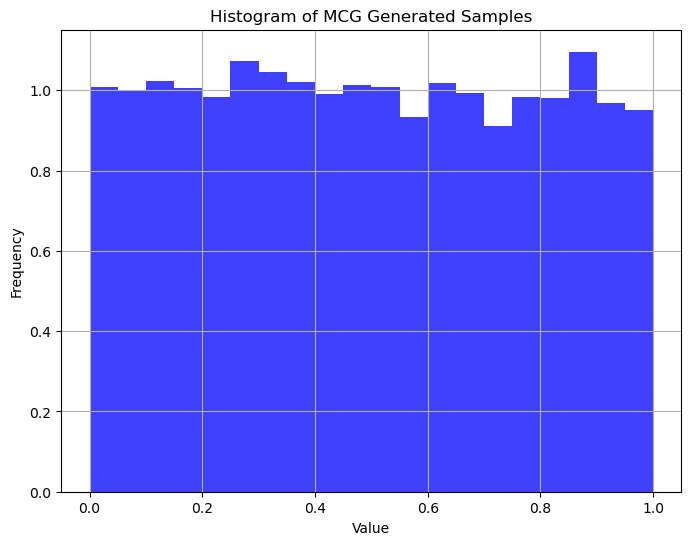

In [4]:
# Plot a histogram of the generated samples
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=20, density=True, alpha=0.75, color='blue')
plt.title('Histogram of MCG Generated Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Linear Congruential Generator

One of the most famous generators used today are linear congruential generators. They are defined by the recurrence relation:

$$x_{j+1} = (a\cdot x_{j} + c)\mod m, \qquad j \geq 0,$$

where we have the magic integers:

- $m$, modulus; $0 < m$.
- $a$, multiplier; $0 \leq a < m$.
- $c$, increment; $0 \leq c < m$.
- $x_{0}$, start value (seed); $0 \leq x_{0} < m$.

In his paper Lehmer mentioned that there is a possibility $c \neq 0$. The linear congruential generator is slightly faster in generating numbers when $c = 0$, that is, when it turns into a multiplicative congruential generator [2].

Linear congruential generator is a misnomer because the transformation $x \mapsto ax + c$ is affine and not linear, but the term _linear_ remained in use, which is why authors also use the term _mixed_ [4].

In practice, different tuple values ​​are used for magic numbers [5]. In the code we will use the values ​​used in `glibc`: $m = 2^{31} = 2147483648$, $a = 1103515245$, and $c = 12345$.

In [5]:
def lcg(seed: int = 123456, size: int = 10000) -> np.ndarray:
    """
    Linear Congruential Generator (LCG) for generating pseudorandom numbers in the unit interval [0, 1).

    Args:
        seed (int, optional): Seed value for the generator. Defaults to 123456.
        size (int, optional): Number of samples to generate. Defaults to 10000.

    Returns:
        np.ndarray: Array of generated pseudorandom numbers in the interval [0, 1)
    """
    m = 2147483648  # Modulus
    a = 1103515245  # Multiplier
    c = 12345       # Increment

    # Define the generator function using lambda
    f = lambda x: (a * x + c) % m

    samples = []
    current_seed = seed  # Initialize the seed value
    for _ in range(size):
        current_seed = f(current_seed)
        normalized_value = current_seed / m  # Normalize to the interval [0, 1)
        samples.append(normalized_value)

    return np.asarray(samples)

# Generate pseudorandom numbers using LCG
samples = lcg()

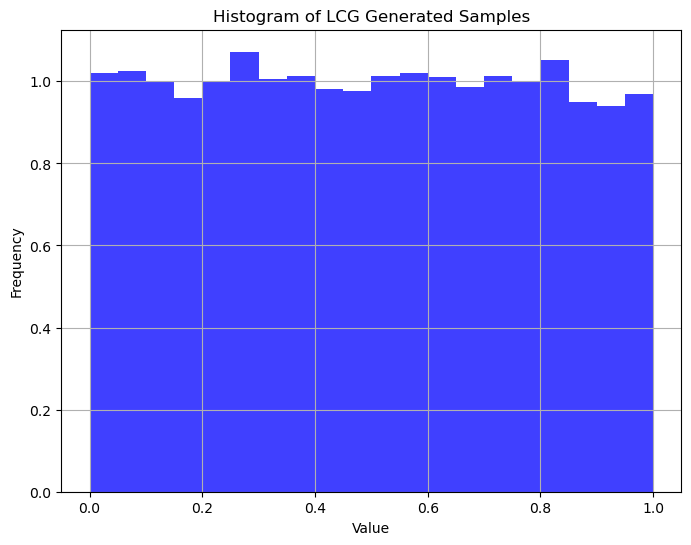

In [6]:
# Plot a histogram of the generated samples
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=20, density=True, alpha=0.75, color='blue')
plt.title('Histogram of LCG Generated Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()